In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [82]:
def compare_app_csv(file_one, file_two, file_three):    
    dflist = []
    df = pd.read_csv(file_one, index_col=None, header=0)
    df['environment'] = "single node"
    dflist.append(df)
    df = pd.read_csv(file_two, index_col=None, header=0)
    df['environment'] = "chameleon 2 node"
    dflist.append(df)
    df = pd.read_csv(file_three, index_col=None, header=0)
    df['environment'] = "jetstream 2 node"
    dflist.append(df)
    df = pd.concat(dflist)
    df['startTime'] = pd.to_datetime(df['startTime'])
    df['endTime'] = pd.to_datetime(df['endTime'])
    df["duration"] = df["endTime"] - df["startTime"]
    df["duration"] = df['duration'] / np.timedelta64(1, 's')
    df.plot.bar(x='environment', y='duration');

# Performance Comparison for creating word2vec model for 100 files

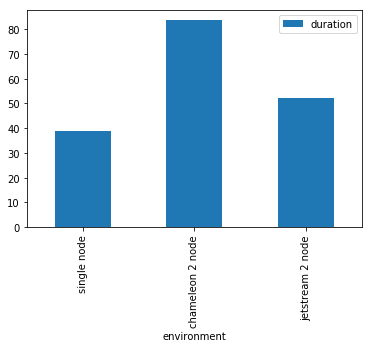

In [83]:
compare_app_csv("single_node/app.csv", "chameleon_2_node/app.csv", "jetstream_2_nodes/app.csv")

# Performance Comparison for creating word2vec model for 1000 files

In [84]:
compare_app_csv("single_node_crawldb_1000/app.csv", "chameleon_2_node_1000/app.csv", "chameleon_2_node_1000/app.csv")

EmptyDataError: No columns to parse from file